# PART I

# EDA & Data Preprocessing on Google App Store Rating Dataset

## Domain: Mobile device apps

### Context:

The Play Store apps data has enormous potential to drive app-making businesses to success. However, many
apps are being developed every single day and only a few of them become profitable. It is important for
developers to be able to predict the success of their app and incorporate features which makes an app
successful. Before any such predictive-study can be done, it is necessary to do EDA and data-preprocessing on
the apps data available for google app store applications. From the collected apps data and user ratings from
the app stores, let's try to extract insightful information.

### Objective:

The Goal is to explore the data and pre-process it for future use in any predictive analytics study.

### Data set Information:

Web scraped data of 10k Play Store apps for analyzing the Android market. Each app (row) has values for
category, rating, size, and more.

### Attribute Information:

1. App - Application name
2. Category - Category the app belongs to.
3. Rating - Overall user rating of the app
4. Size - Size of the app
5. Installs - Number of user reviews for the app
6. Type - Paid or Free
7. Price - Price of the app
8. Content Rating - Age group the app is targeted at - children/Mature 21+ /Adult
9. Genres - An app can belong to multiple genres (apart from its main category). For eg. a musical family game will belong to Music, Game, Family genres.
10. Last Updated - Date when the app was last updated on play store.
11. Current Ver - Current version of the app available on play store.
12. Android Ver - Min required Android Version.

### Questions:

### 1. Import required libraries and read the dataset.

In [1]:
# importing required libraries

# importing numerical library
import numpy as np

# importing pandas library for data analysis 
import pandas as pd

# importing ploting libraries matplotlib and seaborn for visulisation
import matplotlib.pyplot as plt
import seaborn as sns

# importing labelencoder from sklearn library to transform non numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder

# importing standardscaler from sklearn library to standardize the data
from sklearn.preprocessing import StandardScaler

# importing train_test _split from sklearn library to split data into random train and test sets
from sklearn.model_selection import train_test_split

# importing warnings module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv data and storing it in dataframe 
df1 = pd.read_csv('Apps_data.csv')

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# checking first few samples of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
# to get the shape of the dataframe
df1.shape

(10841, 13)

In [5]:
# to get the information of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [6]:
# to check the statistical summary of numerical columns
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The columns that needs to be worked upon for model includes:
* Reviews
* Size
* Installs
* Price

### 4. Check if there are any duplicate records in the dataset? if any drop them.

In [7]:
# to check for duplicate records in the dataset
df1.duplicated().sum()

483

There are 483 duplicate records in the dataset

In [8]:
# viewing the duplicate records to be dropped
df1[df1.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [9]:
# dropping the duplicate records
df1.drop_duplicates(keep='first',inplace=True)

In [10]:
# Checking for duplicate records after dropping them
df1.duplicated().sum()

0

### 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [11]:
# to check the unique categories in the column 'Category'
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

Yes, there is an invalid cateogory named 1.9, which is not relevant.

In [12]:
# checking the records with invalid category before dropping them
df1 [df1.Category=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# dropping a row which has invalid category
df1.drop(df1[df1['Category']=='1.9'].index, inplace = True)

In [14]:
# checking the unique categories in the catogory column after dropping the invalid category
df1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

### 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [15]:
# checking for missing values in the Rating column
df1.Rating.isnull().sum()

1465

There are 1465 missing values in the Rating column.

In [16]:
# dropping the missing values from the Rating column
df1.dropna(subset='Rating',inplace=True)

In [17]:
# checking for missing values in Rating column after dropping them
df1.Rating.isnull().sum()

0

In [18]:
# creating a new column Rating_category from Rating column 
# using pandas cut() function to convert numerical column to categorical column
df1['Rating_category'] = pd.cut(df1.Rating,bins=[0,3.5,5],labels=['low','high'])

In [19]:
# checking the unique values of the newly created Rating_category column
df1.Rating_category.unique()

['high', 'low']
Categories (2, object): ['low' < 'high']

### 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution.

In [20]:
# checking the distibution of the newly created Rating_cateogry column
df1.Rating_category.value_counts()

high    8012
low      880
Name: Rating_category, dtype: int64

In [21]:
# statistical description of the Rating_category column
df1.Rating_category.describe()

count     8892
unique       2
top       high
freq      8012
Name: Rating_category, dtype: object

It is observed that 8012 apps have high rating  that is rating is over 3.5 and 880 apps have low rating which is below 3.5.
So, most of the apps have high rating (above 3.5) and very few apps have low rating.

### 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [22]:
# Checking the datatype of Reviews column
df1.Reviews.dtypes

dtype('O')

In [23]:
# converting the Reviews column into integer type
df1.Reviews = df1.Reviews.astype('int')

In [24]:
# checking the datatype of the Reviews column after converting to int
df1.Reviews.dtypes

dtype('int32')

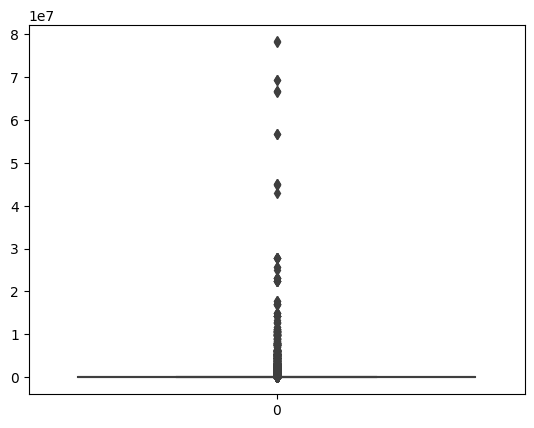

In [25]:
# using box plot to check for outliers in the Reviews column
sns.boxplot(df1['Reviews'])
plt.show()

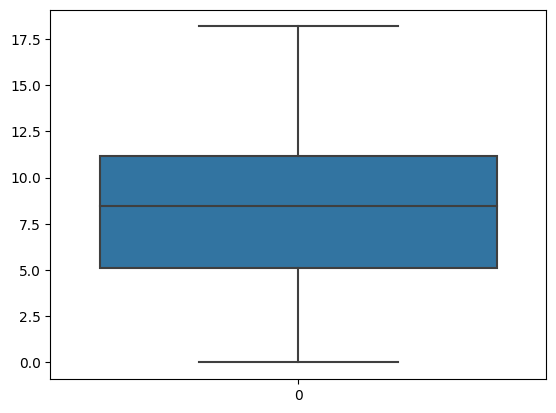

In [26]:
# using log transformation and transforming the column Review and then visualizing the distribution
df1['Reviews'] = np.log(df1['Reviews'])
sns.boxplot(df1['Reviews'])
plt.show()

### 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [27]:
# Checking the datatype of Size column
df1.Size.dtypes

dtype('O')

In [28]:
# Dropping the entries where size= 'Varies with device'
df1.drop(df1[df1['Size']=='Varies with device'].index, inplace = True)

In [29]:
# Checking the alphanumeric values in the Size column
df1.Size

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7424, dtype: object

In [30]:
# replacing the non numeric data in Size column to numeric type using replace with regex as True because it is in string
# using pandas eval function to evaluate the string expression and converting it into integer type using astype() function
df1.Size = df1['Size'].replace({"M":"1000000", "K":"1000","k":"1000"},regex=True).map(pd.eval).astype('int')

In [31]:
# Viewing the Size column after converting to numerical values
df1.Size

0        191000000
1        141000000
2                8
3        251000000
4                2
           ...    
10833      6191000
10834            2
10836    531000000
10837            3
10840    191000000
Name: Size, Length: 7424, dtype: int32

In [32]:
# checking the datatype of Size column after converting
df1.Size.dtypes

dtype('int32')

### 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [33]:
# Replcing the unwanted characters in the Installs column 
df1['Installs'] = df1.Installs.str.replace('+', '')

In [34]:
# Replcing the unwanted characters in the Installs column and converting it to int type
df1['Installs'] = df1['Installs'].str.replace(',','').astype(int)

In [35]:
# Checking the Installs column after relacing the unwanted characters
df1.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7424, dtype: int32

In [36]:
# Checking the datatype of Installs column after converting to int type
df1.Installs.dtypes

dtype('int32')

### 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [37]:
# checking the datatype of Price column
df1.Price.dtypes

dtype('O')

In [38]:
# viewing the unique values in price column
df1.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [39]:
# removing the $ sign using replace function and converting to float type 
df1['Price'] = df1['Price'].str.replace('$','').astype(float)

In [40]:
# checking the datatype of the Price column after replacing $ and converting to float type
df1.Price.dtypes

dtype('float64')

### 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [41]:
# Dropping the columns which are redundant for the analysis
df1 = df1.drop(['Rating','App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' ],axis=1)

In [42]:
# viewing the dataframe after dropping the redundant columns
df1.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,191000000,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.874198,141000000,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379508,8,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281384,251000000,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.874198,2,100000,Free,0.0,Everyone,high


### 13. Encode the categorical columns.

In [43]:
# creating LabelEncoder() object
le = LabelEncoder()

In [44]:
# Encoding lables in the columns Category, Type, Content Rating and Rating_category using LabelEncoder
df1.iloc[:,[0,4,6,7]] = df1.iloc[:,[0,4,6,7]].apply(le.fit_transform)

In [45]:
# Viewing the first few records after encoding the categorical column
df1.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,5.068904,191000000,10000,0,0.0,1,0
1,0,6.874198,141000000,500000,0,0.0,1,0
2,0,11.379508,8,5000000,0,0.0,1,0
3,0,12.281384,251000000,50000000,0,0.0,4,0
4,0,6.874198,2,100000,0,0.0,1,0


### 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [46]:
# Segregating the target and independent features
# Creating the independent features from the dataset
X = df1.drop('Rating_category',axis=1)

In [47]:
# Creating the target feature from the dataset
y = df1['Rating_category']

### 15. Split the dataset into train and test.

In [48]:
# Splitting the dataset into train and test sets using train_test_split from sklearn library
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [49]:
# checking the shape of the train and test sets of independent features
X_train.shape,X_test.shape

((5196, 7), (2228, 7))

In [50]:
# checking the shape of the train and test sets of target feature
y_train.shape,y_test.shape

((5196,), (2228,))

### 16. Standardize the data, so that the values are within a particular range

In [51]:
# cerating a copy of the dataframe
df1_cpy = df1.copy()

In [52]:
# creating the StandardScaler object for standardizing the data
ss = StandardScaler()

# Standardizing the Reviews, Size and Installs columns
df1_cpy['Reviews'] = ss.fit_transform(df1_cpy[['Reviews']])
df1_cpy['Size'] = ss.fit_transform(df1_cpy[['Size']])
df1_cpy['Installs'] = ss.fit_transform(df1_cpy[['Installs']])

# viewing the dataframe after standardizing the columns in the dataframe
df1_cpy

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,0,-0.679953,-0.072447,-0.168764,0,0.0,1,0
1,0,-0.196531,-0.272934,-0.158181,0,0.0,1,0
2,0,1.009900,-0.838307,-0.060990,0,0.0,1,0
3,0,1.251404,0.168137,0.910911,0,0.0,4,0
4,0,-0.196531,-0.838307,-0.166820,0,0.0,1,0
...,...,...,...,...,...,...,...,...
10833,3,-1.023974,-0.813483,-0.168958,0,0.0,1,0
10834,11,-1.516228,-0.838307,-0.168969,0,0.0,1,0
10836,11,-1.063231,1.290864,-0.168872,0,0.0,1,0
10837,11,-1.666082,-0.838307,-0.168977,0,0.0,1,0


# PART II

# Data Visualization on Honey Production dataset using seaborn and matplotlib libraries

## Domain: Food and agriculture

### Context:

In 2006, a global concern was raised over the rapid decline in the honeybee population, an integral component
to American honey agriculture. Large numbers of hives were lost to “Colony-Collapse-Disorder”, a
phenomenon of disappearing “worker-bees” causing the remaining “hive-colony” to collapse. Speculation
around the cause of this disorder points to hive-diseases and pesticides harming the pollinators, though no
overall consensus has been reached. Twelve years later, some industries are observing recovery but the
American honey industry is still largely struggling. The U.S. used to locally produce over half the honey it
consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey
consumed every year originating from imports. This dataset provides insight into honey production supply and
demand in America by state from 1998 to 2012.


### Objective:

The Goal is to use Python visualization libraries such as seaborn and matplotlib to investigate the data and get
some useful conclusions.

### Attribute Information:

1. numcol - Number of honey producing colonies.
2. yield percol - Honey yield per colony. (Unit is pounds)
3. total prod - Total production (numcol x yieldpercol). (Unit is pounds)
4. price per lb - Refers to average price per pound based on expanded sales. Unit is dollars.
5. prodvalue - Value of production (total prod x priceperlb). Unit is dollars.
6. Stocks - Refers to stocks held by producers. Unit is pounds
7. Year - Calendar year.
8. State - Different states' names.

### Questions:

### 1. Import required libraries and read the dataset.

In [53]:
# importing required libraries

# importing numerical library

import numpy as np

# importing pandas library for data analysis 

import pandas as pd

# importing ploting libraries matplotlib and seaborn for visulisation

import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings module to ignore warnings

import warnings
warnings.filterwarnings('ignore')


In [54]:
# reading the csv data and storing it in dataframe 
df2 = pd.read_csv('honeyproduction.csv')
# checking the first few records
df2.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [55]:
# checking the first few samples from the dataset
df2.sample(15)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
134,FL,220000.0,100,22000000.0,3432000.0,0.64,14080000.0,2001
509,CA,410000.0,67,27470000.0,6318000.0,1.55,42579000.0,2010
408,NM,6000.0,59,354000.0,138000.0,1.42,503000.0,2007
222,FL,210000.0,71,14910000.0,1491000.0,1.32,19681000.0,2003
579,UT,23000.0,39,897000.0,170000.0,1.75,1570000.0,2011
330,OH,15000.0,69,1035000.0,580000.0,1.40,1449000.0,2005
351,ID,95000.0,44,4180000.0,2592000.0,0.97,4055000.0,2006
528,NJ,13000.0,35,455000.0,73000.0,1.90,865000.0,2010
173,AL,12000.0,86,1032000.0,103000.0,1.18,1218000.0,2002
400,MI,72000.0,64,4608000.0,2350000.0,1.19,5484000.0,2007


In [56]:
# checking the shape of the dataframe
df2.shape

(626, 8)

In [57]:
# checking the information of the dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### 3. Display the percentage distribution of the data in each year using the pie chart.

<Axes: ylabel='year'>

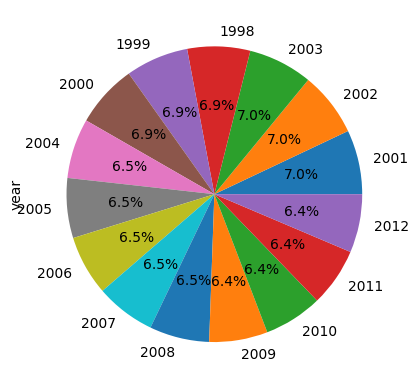

In [58]:
# to display the percentage distribution of the data in each year using the pie chart
df2.year.value_counts().plot(kind='pie',autopct = '%1.1f%%')

The above pie chart shows the distribution of honey production in percentages in different years.

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.

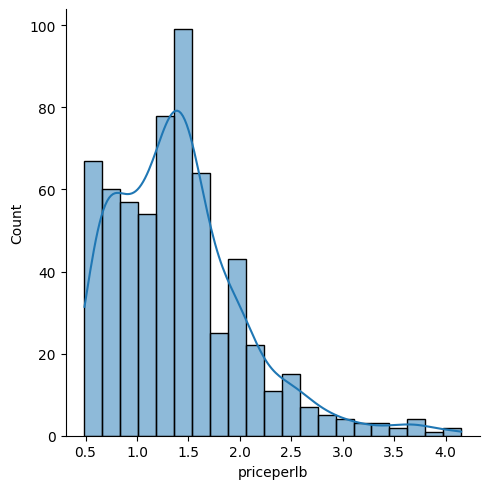

In [59]:
# plotting the distibution of "price per lb" variable using displot
sns.displot(df2['priceperlb'],kde=True)

It is observed that the most common value of price per lb is 1.5 dollars having nearly 100 counts and the least common value is 3.9 dollars having nearly 1 count. The distribution of average price per pound of honey production is positively skewed and is unimodal in nature.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.

<Axes: xlabel='numcol', ylabel='prodvalue'>

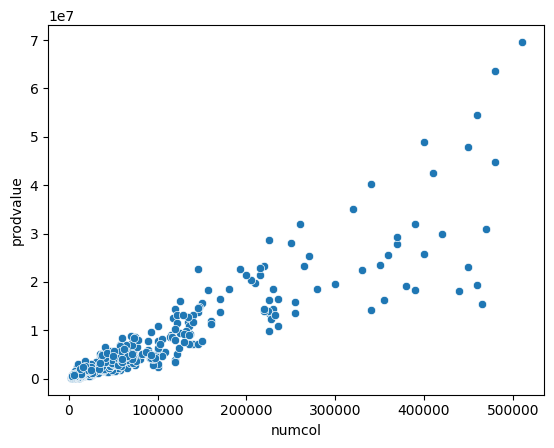

In [60]:
# Using sactterplot to understand the relationship between the variables 'numcol' and 'prodval'
sns.scatterplot(df2,x='numcol',y='prodvalue')

It is observed that the numcol and prodval variables have a positive relationship as seen from the scatterplot. With the increase in numcol, the prodval also increases.

Thus, it can be concluded that with the increase in number of honey producing colonies the value of production also increases.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.

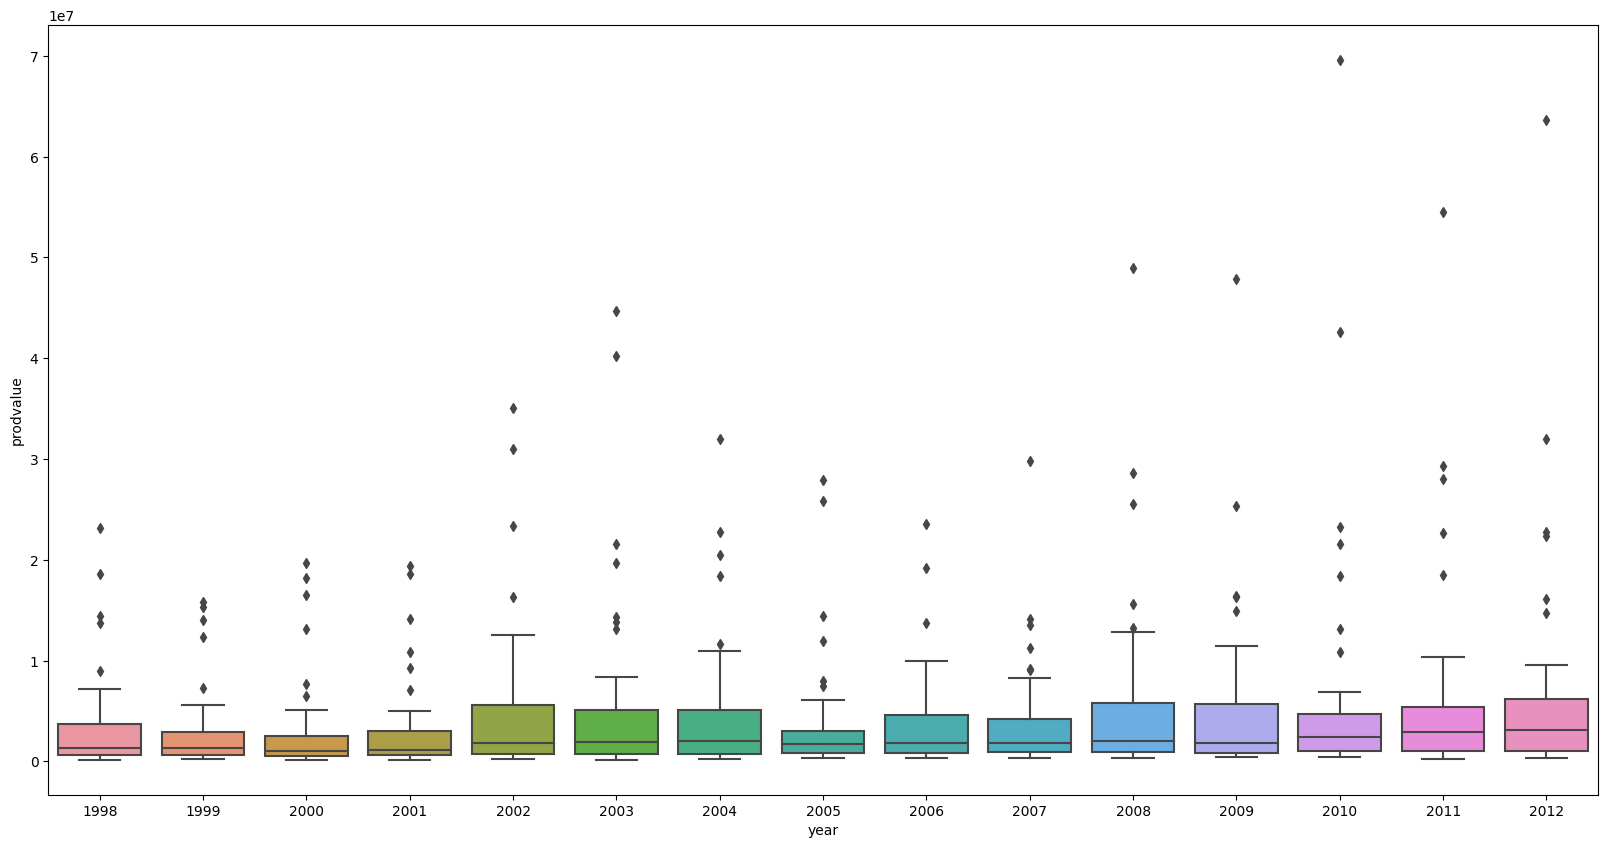

In [61]:
# ploting boxplots to understand the relationship between year and prodvalue
plt.figure(figsize=(20,10))
sns.boxplot(df2,x='year',y='prodvalue')
plt.show()

From this boxplot it is seen that highest value of production is in the year 2010 with the value of highest data point nearly 7000000 dollars .It is seen that there are many outliers in the boxplot for all the years, so plotting it without outlier for better understanding.

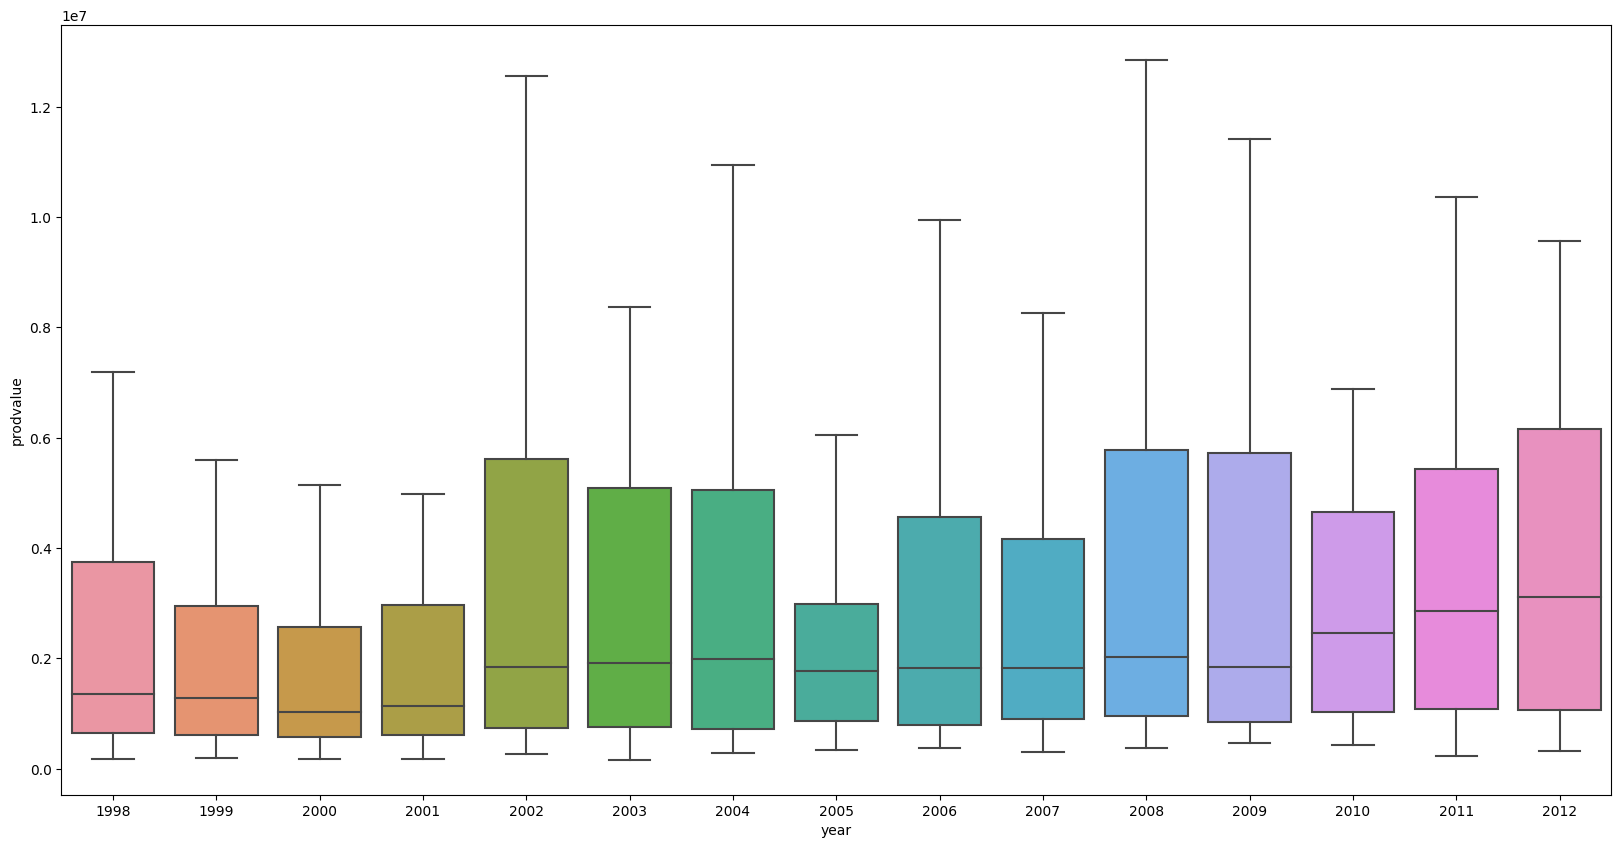

In [62]:
# plotting the boxplot without outliers using showfliers as False for better observation
plt.figure(figsize=(20,10))
sns.boxplot(df2,x='year',y='prodvalue',showfliers = False)
plt.show()

It is observed from the boxplot that the prodvalue is higher in years 2002,2008,2009,2011 and 2012 and lower in years 2000,2005,1999 and 2001.

### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')

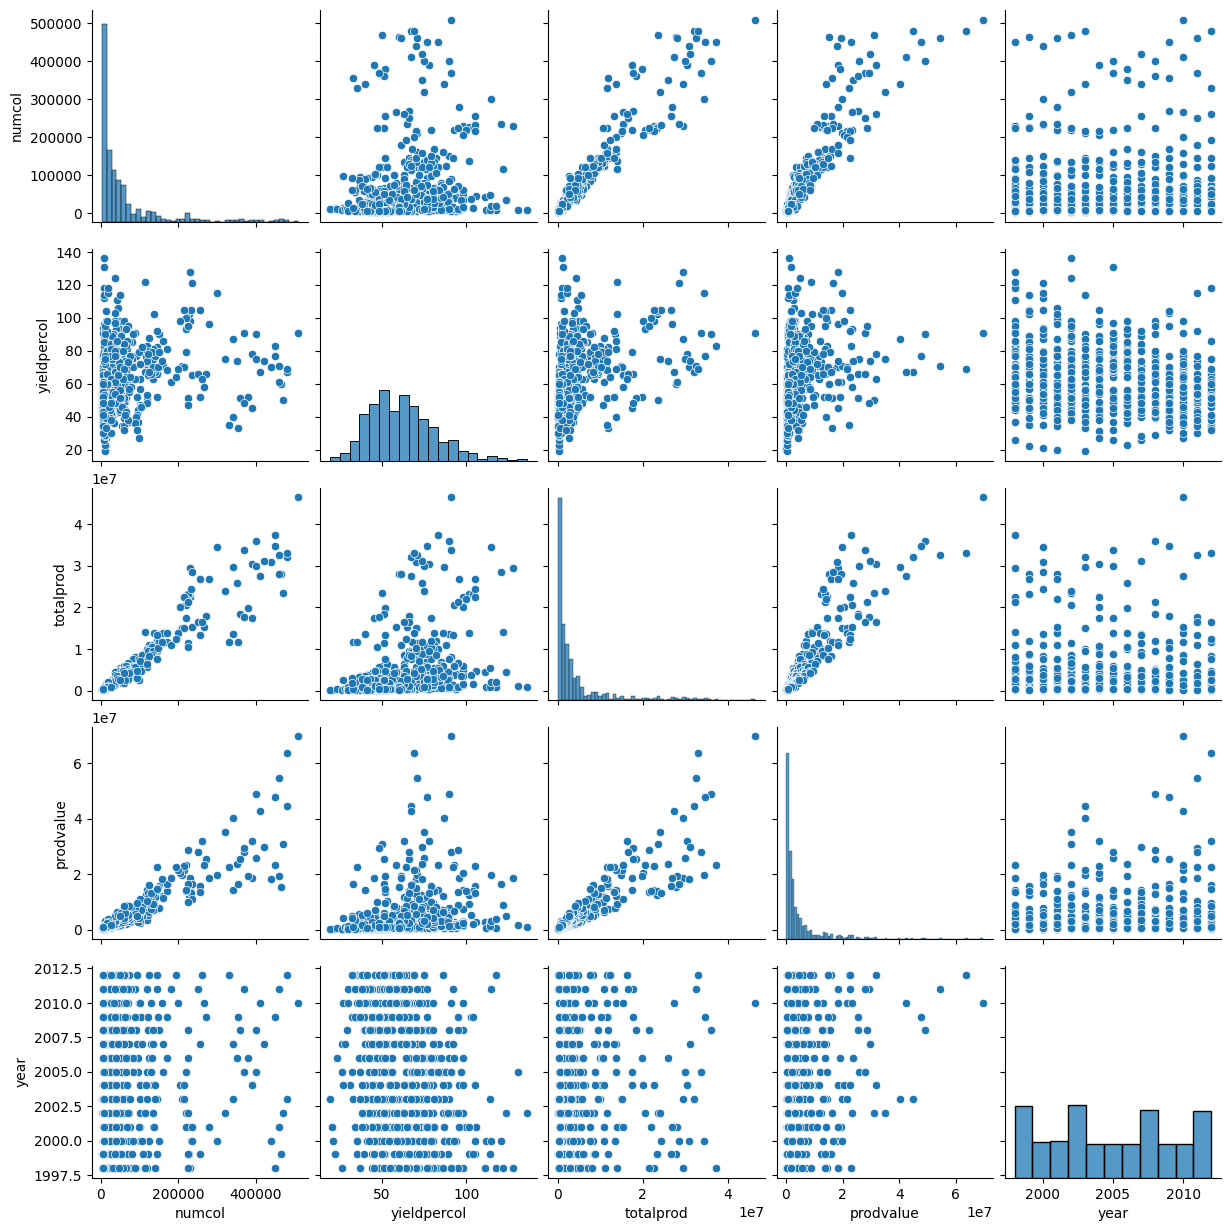

In [63]:
# understanding the relationship between multiple pairs of variables using pairplot
sns.pairplot(df2,vars=['numcol', 'yieldpercol', 'totalprod', 'prodvalue','year'])

It is observed from the pairplot that the numcol has positive linear relationship with totalprod and prodvalue. Also, there is positive linear relationship between prodvalue and totalprod.

### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'stocks', 'price per lb', 'prodvalue')

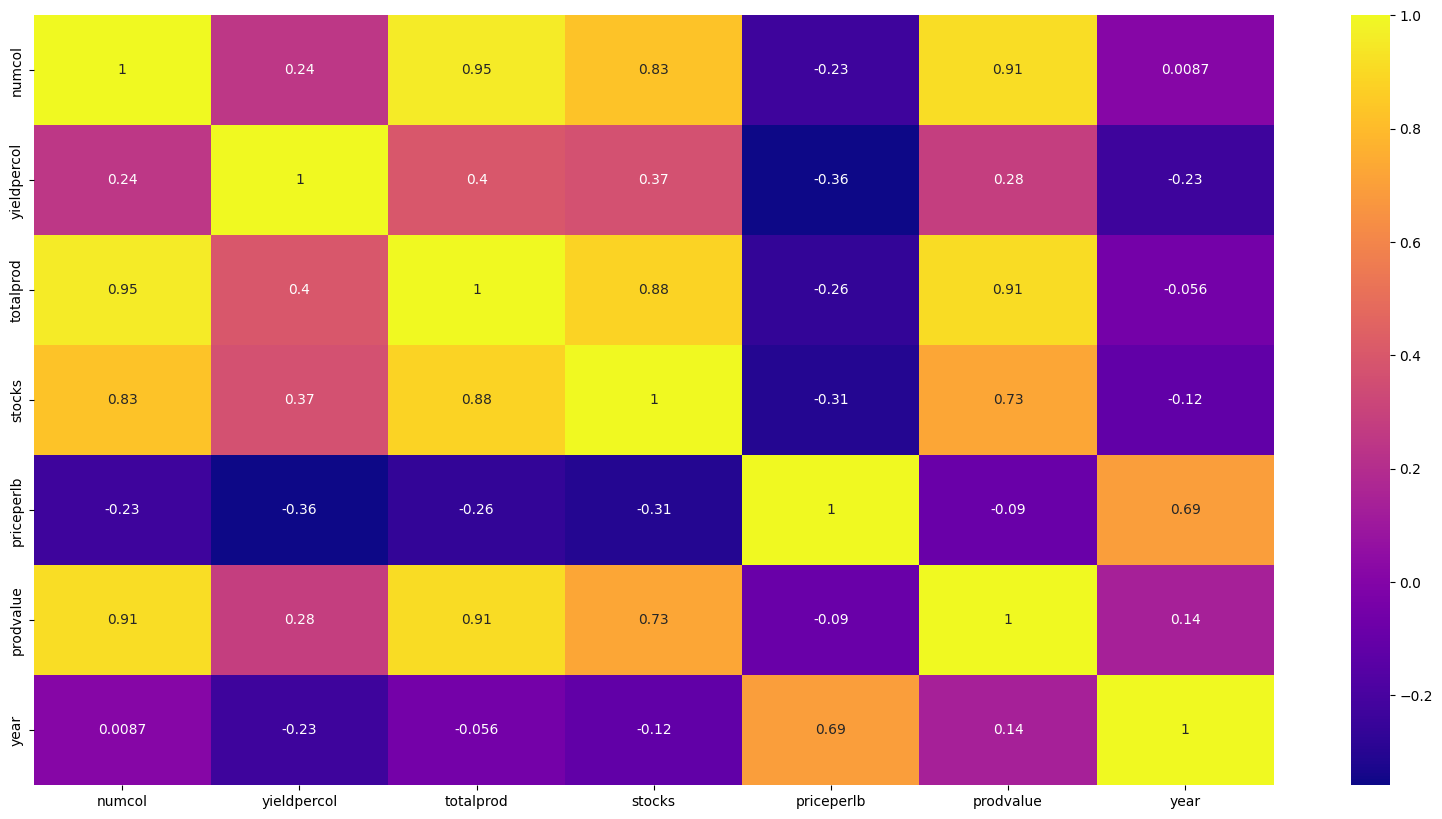

In [64]:
# visulazing the correlation matrix using seaborn's heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True,cmap='plasma')
plt.show()

It is seen from the correaltion matrix that:
* There is strong positive correlation between numcol and totalprod with value of correlation coeffiecient equal to 0.95.
* Followed by it, there is strong correlation between numcol and prodvalue with value of correlation coeffiecient equal to 0.91. * There is strong positive correlation between totalprod and prodvalue with value of correlation coeffiecient equal to 0.91.
* There is strong positive correlation between totalprod and stocks with value of correlation coeffiecient equal to 0.88.
* There is strong positive correlation between numcol and stocks with value of correlation coeffiecient equal to 0.83.
* There is positive correlation between stocks and prodvalue with value of correlation coeffiecient equal to 0.73.

The correlation between other variables are weaker when compared to between these variables. There is weaker negative correlation between pricelb and numcol, yieldpercol, totalprod, stocks and prodvalue.